|クラス分類のための線形モデル|
|:-|

線形モデルはクラス分類にも多用されている。まず、２クラス分類を見てみよう。この場合は、次の式で予測を行う。$$\hat{y}=w[0] \times x[0] + w[1] \times x[1]+ \cdots + w[p] \times x[p] + b > 0$$

この式は、線形回帰のバイトよく似ているが、特徴量の重み付き和を単に返すのではなく、予測された値が0を請えるかどうかで分割している。この関数の値が0より小さければ、クラスは-1になる。0より大きければ、クラスは+1になる。この予測のルールはすべての線形モデルによるクラス分類に共通している。ここでも、係数（$w$）と切片（$b$）を求めるには様々な方法がある。

線形モデルによるクラス分類では、**決定境界**が入力の線形関数になる。言い換えると線形の２クラス分類器は、２つのクラスを直線や平面や超平面で分割するということだ。本節でこの例を示す。


線形モデルを学習するにはさまざまなアルゴリズムがある。これらのアルゴリズムは以下の２点で区別される。
- 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
- 正規化を行うか。行うならどの方法を使うか。

「訓練データへの適合度」を測る尺度は、アルゴリズムによって異なる。linear_model.LogisticRegressionに実装されている**ロジスティック回帰**はと、svm.LineatSVCに実装されている**線形サポートベクターマシン**は、最も一般的な線形クラス分類アルゴリズムだ。LogisticRegressionモデルとLinearSVCモデルをforgeデータセットに適用して、決定境界を可視化してみよう。（**図2-15**）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

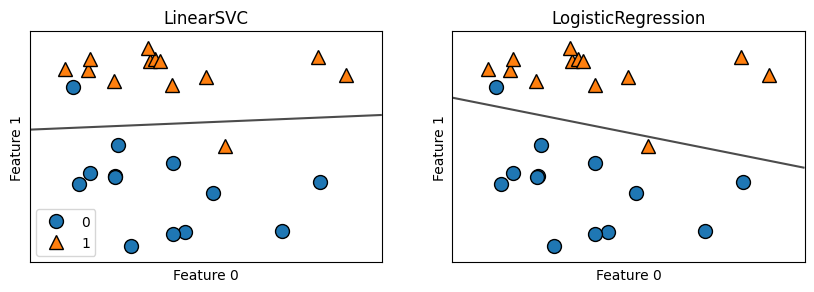

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

この図は、以前と同じようにforgeデータセットの第1特徴量を$x$軸に、第2特徴量をy軸にとり、LinearSVCとLogisticRegressionで見つけた決定境界を直線で表示している。直線の下がクラス0、上がクラス1になる。つまり、黒い線よりも上にあるデータポイントはクラス分類器によってクラス1に分類され、下にあるデータポイントはクラス0に分類される。２つのモデルによる決定境界はよく似ている。両方のモデルはともに、２つのポイントを他方のクラスに分類している。デフォルトではこれらのモデルは、Ridgeが回帰で行ったのと同様に、L2正則化を行う。

LinearSVCとLogisticRegressionにおける正則化の強度を決定するトレードオフパラメータはＣと呼ばれ、Ｃが大きくなると正則化は**弱く**なる。つまり、パラメータＣを大きくすると、LinearSVCとLogisticRegressionは訓練データに対しての適合度を挙げようとするが、パラメータＣを小さくすると係数ベクトル（$w$）を0に近づけることを重視するようになる。

Ｃの影響にはもう一つ面白い側面がある。小さいＣを用いると、データポイントの「大多数」に対して適合しようとするが、大きいＣを用いると、個々のデータポイントを正確にクラス分類することを重視するようになる。LinearSVCの場合の様子を見てみよう。（**図2-16**）

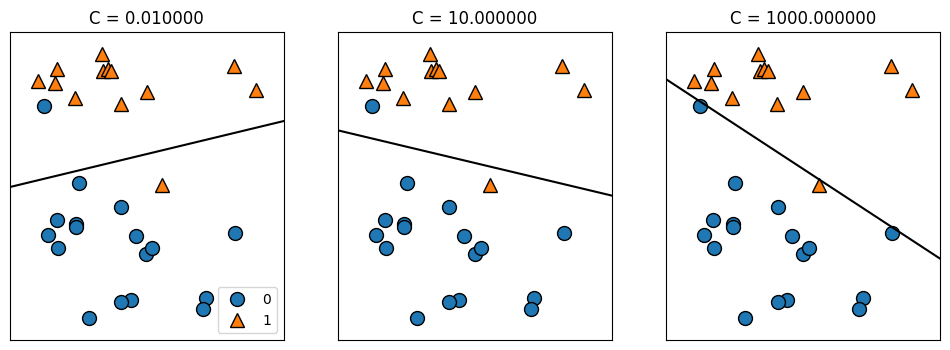

In [5]:
mglearn.plots.plot_linear_svc_regularization()

**図2-16 forgeデータセットを用いた場合の異なるＣに対する決定境界**